Урок 1. Алгоритмы машинного обучения

In [839]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [840]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [841]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [842]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [843]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [845]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [846]:
df['Embarked'].fillna('S', inplace=True)

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_8404\399897443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [847]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [848]:
df['Age'].median()

28.0

In [849]:
df.groupby(by='Pclass')['Age'].median()


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [850]:
age1 = 37.0
age2 = 29.0
age3 = 24.0

In [851]:
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return age1
        elif row['Pclass'] == 2:
            return age2
        else:
            return age3
    return row['Age']

In [852]:
df['Age'] = df.apply(fill_age, axis=1)

In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<Axes: >

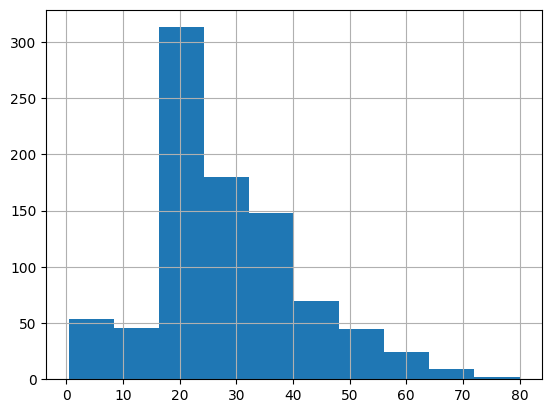

In [854]:
df['Age'].hist()

In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [856]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [858]:
df[list(pd.get_dummies(df['Embarked']).columns)] = pd.get_dummies(df['Embarked'])

In [859]:
df.drop('Embarked', axis=1, inplace=True)

In [860]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,male,22.0,1,0,7.2500,False,False,True
1,1,1,female,38.0,1,0,71.2833,True,False,False
2,1,3,female,26.0,0,0,7.9250,False,False,True
3,1,1,female,35.0,1,0,53.1000,False,False,True
4,0,3,male,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,False,False,True
887,1,1,female,19.0,0,0,30.0000,False,False,True
888,0,3,female,24.0,1,2,23.4500,False,False,True
889,1,1,male,26.0,0,0,30.0000,True,False,False


In [861]:
def male_female(data):
    if data == 'male':
        return 1
    else:
        return 0

Male - 1, Female - 0

In [862]:
df['Sex'] = df['Sex'].apply(male_female)

In [863]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,False,True
888,0,3,0,24.0,1,2,23.4500,False,False,True
889,1,1,1,26.0,0,0,30.0000,True,False,False


Модель ИИ

In [864]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [865]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [866]:
x, y

(     Pclass  Sex   Age  SibSp  Parch     Fare      C      Q      S
 0         3    1  22.0      1      0   7.2500  False  False   True
 1         1    0  38.0      1      0  71.2833   True  False  False
 2         3    0  26.0      0      0   7.9250  False  False   True
 3         1    0  35.0      1      0  53.1000  False  False   True
 4         3    1  35.0      0      0   8.0500  False  False   True
 ..      ...  ...   ...    ...    ...      ...    ...    ...    ...
 886       2    1  27.0      0      0  13.0000  False  False   True
 887       1    0  19.0      0      0  30.0000  False  False   True
 888       3    0  24.0      1      2  23.4500  False  False   True
 889       1    1  26.0      0      0  30.0000   True  False  False
 890       3    1  32.0      0      0   7.7500  False   True  False
 
 [891 rows x 9 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [867]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [868]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [869]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [870]:
y_pred = classifier.predict(x_test)

In [871]:
percent = accuracy_score(y_test, y_pred) * 100

In [872]:
percent

82.95964125560538

82.95964125560538

In [873]:
confusion_matrix(y_test, y_pred)

array([[126,  16],
       [ 22,  59]], dtype=int64)

In [874]:
classifier.predict([[3, 1, 22.0, 1, 0, 56.2500, False, False, True]])

array([1], dtype=int64)

Pclass  Sex   Age  SibSp  Parch     Fare      C      Q      S

In [875]:
classifier.predict([[2, 1, 35.0, 0, 0, 10, True, False, False]])

array([0], dtype=int64)